In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from lmfit import Parameters, Minimizer, minimize, report_fit

import scqubits as scq

scq.settings.FUZZY_SLICING = True

In [3]:
osc = scq.Oscillator(E_osc = 1)
gq = scq.GenericQubit(E = 1)

g = 0.1
hilbertspace = scq.HilbertSpace([gq, osc])

hilbertspace.add_interaction(
    g_strength = g,
    op1 = osc.annihilation_operator,
    op2 = gq.sp_operator,
    add_hc = True
)

In [4]:
def update_hilbertspace(E, detuning):
    gq.E = E
    osc.E_osc = E + detuning

x = np.linspace(0, 10, 21)
egv = 4

pname1 = 'E'
E_vals = x
pname3 = 'detuning'
detuning_vals = x

paramvals_by_name = {pname1: E_vals, pname3: detuning_vals}

sweep = scq.ParameterSweep(
    hilbertspace=hilbertspace,
    paramvals_by_name=paramvals_by_name,
    update_hilbertspace=update_hilbertspace,
    evals_count=egv,
    num_cpus=4
)

Parallel compute bare eigensys [num_cpus=4]

Parallel compute bare eigensys [num_cpus=4]

Parallel compute dressed eigensys [num_cpus=4]

In [76]:
def create_model_data(x, e, transition_list):
    full_data = create_interpolated_data(x, egv, e)
    
    model = np.array([])
    for transition in transition_list:
        i = transition[0]
        f = transition[1]
        initial_state = full_data[:,i]
        final_state = full_data[:,f]
        energy_diff = final_state - initial_state
        model = np.append(model, energy_diff)
    return model

def create_interpolated_data(x, egv, e):
    egv_x = np.linspace(0, egv-1, egv)
    points = (x, x, egv_x)
    values = sweep["evals"]
    
    matrix = np.zeros((x.size,4))
    row_index = 0
    for i in x:
        column_index = 0
        for j in egv_x:
            matrix[row_index, column_index] = interpolate.interpn(points, values, np.array([e, i, j]))[0]
            column_index+=1
        row_index+=1
    return matrix

In [6]:
def jc_resid(pars, x, transition_list, data=None):
    e = pars['e']
    
    model = create_model_data(x, e, transition_list)
    if data is None:
        return model
    resid = model - data
    return resid.flatten()

params = Parameters()
params.add('e', value=3.4, min = 0, max = 10)

transitions = [(0,1),(1,2),(2,3),(0,3)]
e = 8.1
jc_data = create_model_data(x, e, transitions)
jc_noise = jc_data + 0.25*np.random.normal(size=jc_data.shape)

min1 = Minimizer(jc_resid, params, fcn_args=(x, transitions,), fcn_kws={'data': jc_noise})
out1 = min1.leastsq()
fit1 = jc_resid(out1.params, x, transitions)
report_fit(out1.params)

out2 = minimize(jc_resid, params, args=(x, transitions, jc_noise))
fit2 = jc_resid(out2.params, x, transitions)
report_fit(out2.params)

[[Variables]]
    e:  8.09765939 +/- 0.00712532 (0.09%) (init = 3.4)
[[Variables]]
    e:  8.09765939 +/- 0.00712532 (0.09%) (init = 3.4)


In [7]:
array_shape = (x.size, egv)
a = np.reshape(jc_noise, array_shape, 'F')
b = np.reshape(fit1, array_shape, 'F')
c = np.reshape(fit2, array_shape, 'F')

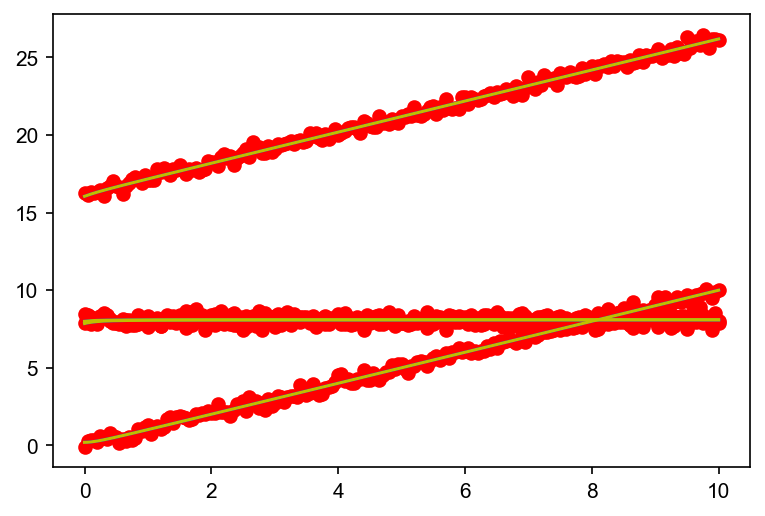

In [8]:
plt.plot(x, a, 'ro')
plt.plot(x, b, 'b')
plt.plot(x, c, 'y')
plt.show()

In [ ]:
hilbertspace.get_initdata()

In [ ]:
hilbertspace.osc_subsys_list[0]

In [ ]:
hilbertspace.qbt_subsys_list[0]

In [ ]:
type(hilbertspace.qbt_subsys_list[0].id_str)

In [ ]:
def create_compositeHilbert_params_Dict():
    osc_params = {}
    qbt_params = {}

    for osc in hilbertspace.osc_subsys_list:
        osc_params[osc.id_str] = {}
        osc_params[osc.id_str]["E_osc"] = osc.E_osc
    for qbt in hilbertspace.qbt_subsys_list:
        qbt_params[qbt.id_str] = {} 
        qbt_params[qbt.id_str]["E"] = qbt.E
    
    return {**osc_params, **qbt_params}

create_compositeHilbert_params_Dict()

In [3]:
scq.GUI()

Output(layout=Layout(width='975px'))

In [32]:
test_values = {
    'E':8.4
}
paramsweep = sweep["evals"]
for param, param_value in test_values.items():
    paramsweep = paramsweep[param:param_value]
paramsweep

NamedSlotsNdarray([[-4.2       ,  4.1       ,  4.3       , 12.45857864],
                   [-4.2       ,  4.12192236,  4.32807764, 12.53138593],
                   [-4.2       ,  4.1381966 ,  4.3618034 , 12.6       ],
                   [-4.2       ,  4.15      ,  4.4       , 12.66492189],
                   [-4.2       ,  4.15857864,  4.44142136, 12.72679492],
                   [-4.2       ,  4.16492189,  4.48507811, 12.78625414],
                   [-4.2       ,  4.16972244,  4.53027756, 12.84384472],
                   [-4.2       ,  4.17344356,  4.57655644, 12.9       ],
                   [-4.2       ,  4.1763932 ,  4.6236068 , 12.95505103],
                   [-4.2       ,  4.17877855,  4.67122145, 13.00924635],
                   [-4.2       ,  4.18074176,  4.71925824, 13.06277187],
                   [-4.2       ,  4.1823825 ,  4.7676175 , 13.11576708],
                   [-4.2       ,  4.18377223,  4.81622777, 13.16833752],
                   [-4.2       ,  4.18496324,  4.86

In [77]:
interpolated_data = create_interpolated_data(x, 4, 8.4)

In [78]:
print(interpolated_data
)

[[-4.2         4.1         4.3        12.45857864]
 [-4.2         4.12192236  4.32807764 12.53138593]
 [-4.2         4.1381966   4.3618034  12.6       ]
 [-4.2         4.15        4.4        12.66492189]
 [-4.2         4.15857864  4.44142136 12.72679492]
 [-4.2         4.16492189  4.48507811 12.78625414]
 [-4.2         4.16972244  4.53027756 12.84384472]
 [-4.2         4.17344356  4.57655644 12.9       ]
 [-4.2         4.1763932   4.6236068  12.95505103]
 [-4.2         4.17877855  4.67122145 13.00924635]
 [-4.2         4.18074176  4.71925824 13.06277187]
 [-4.2         4.1823825   4.7676175  13.11576708]
 [-4.2         4.18377223  4.81622777 13.16833752]
 [-4.2         4.18496324  4.86503676 13.22056383]
 [-4.2         4.18599451  4.91400549 13.27250828]
 [-4.2         4.18689563  4.96310437 13.32421951]
 [-4.2         4.18768944  5.01231056 13.37573593]
 [-4.2         4.18839377  5.06160623 13.42708818]
 [-4.2         4.18902278  5.11097722 13.47830094]
 [-4.2         4.1895878   5.16

In [55]:
for param, param_x in sweep.param_info.items():
    print (param, param_x.size)

E 201
detuning 201


In [37]:
egv_x = np.linspace(0, 3, 4)
points = (x, x, egv_x)

In [43]:
interpolated_size = ()
for i in range(len(points)):
    if isinstance(points[i], np.ndarray):
        interpolated_size = interpolated_size + (points[i].size,)
    else:
        interpolated_size = interpolated_size + (points[i],)

interpolated_size

(201, 201, 4)

In [79]:
current_values ={
    "E": 8.4, 
    "detuning":1.5
}

def create_point(sweep, current_values, sweep_value, evals_value):
    point = []
    for param, value in current_values.items():
        if param == sweep:
            point.append(sweep_value)
        else:
            point.append(value)
    point.append(evals_value)

    return point

def create_points(parametersweep, evals):
    points = ()
    for param, param_x in parametersweep.param_info.items():
        points = points + (param_x,)
    
    evals_x = np.linspace(0, evals-1, evals)
    points = points + (evals_x,)

    return points

def get_interpolated_data_size(parametersweep, sweep, evals):
    interpolated_size = ()
    for param, param_x in parametersweep.param_info.items():
        if param != sweep:
            interpolated_size = interpolated_size + (param_x.size,)
    
    interpolated_size = interpolated_size + (evals,)

    return interpolated_size

def create_interpolated_data(parametersweep, sweep, current_values):
    evals = parametersweep.eigenvals().shape[-1]
    sweep_x = parametersweep.param_info[sweep]
    points = create_points(parametersweep, evals)
    values = parametersweep["evals"]

    matrix_size = get_interpolated_data_size(parametersweep, sweep, evals)
    matrix = np.zeros(matrix_size)
    row_index = 0
    for sweep_value in sweep_x:
        column_index = 0
        for evals_value in points[-1]:
            point = create_point(sweep, current_values, sweep_value, evals_value)
            matrix[row_index, column_index] = interpolate.interpn(points, values, np.array(point))[0]
            column_index+=1
        row_index+=1
    return matrix

In [81]:
create_interpolated_data(sweep, 'detuning', current_values)

array([[-4.2       ,  4.1       ,  4.3       , 12.45857864],
       [-4.2       ,  4.12192236,  4.32807764, 12.53138593],
       [-4.2       ,  4.1381966 ,  4.3618034 , 12.6       ],
       [-4.2       ,  4.15      ,  4.4       , 12.66492189],
       [-4.2       ,  4.15857864,  4.44142136, 12.72679492],
       [-4.2       ,  4.16492189,  4.48507811, 12.78625414],
       [-4.2       ,  4.16972244,  4.53027756, 12.84384472],
       [-4.2       ,  4.17344356,  4.57655644, 12.9       ],
       [-4.2       ,  4.1763932 ,  4.6236068 , 12.95505103],
       [-4.2       ,  4.17877855,  4.67122145, 13.00924635],
       [-4.2       ,  4.18074176,  4.71925824, 13.06277187],
       [-4.2       ,  4.1823825 ,  4.7676175 , 13.11576708],
       [-4.2       ,  4.18377223,  4.81622777, 13.16833752],
       [-4.2       ,  4.18496324,  4.86503676, 13.22056383],
       [-4.2       ,  4.18599451,  4.91400549, 13.27250828],
       [-4.2       ,  4.18689563,  4.96310437, 13.32421951],
       [-4.2       ,  4.

In [17]:
sweep.get_subsys(0).default_params().keys()

dict_keys(['E'])

In [8]:
hilbertspace.get_initdata

<bound method HilbertSpace.get_initdata of HilbertSpace(**{'subsystem_list': (GenericQubit(**{'E': 0.0, 'id_str': 'GenericQubit_1'}), Oscillator(**{'E_osc': 0.0, 'l_osc': None, 'truncated_dim': 6, 'id_str': 'Oscillator_1'})), 'interaction_list': [InteractionTerm(**{'g_strength': 0.1, 'operator_list': [(1, array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.41421356, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.73205081, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.23606798],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])), (0, array([[0., 1.],
       [0., 0.]]))], 'add_hc': True})]})>

In [5]:
for subsys in sweep.system_params['subsystem_list']:
    print(subsys.get_initdata())

{'E': 0.0, 'id_str': 'GenericQubit_1'}
{'E_osc': 0.0, 'l_osc': None, 'truncated_dim': 6, 'id_str': 'Oscillator_1'}


In [14]:
for param, param_dict in sweep.param_info.items():
    print(param_dict[-1])

sweep.param_info.items()

10.0
10.0


odict_items([('E', array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])), ('detuning', array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]))])

In [7]:
sweep.hilbertspace

HilbertSpace(**{'subsystem_list': (GenericQubit(**{'E': 0.0, 'id_str': 'GenericQubit_1'}), Oscillator(**{'E_osc': 0.0, 'l_osc': None, 'truncated_dim': 6, 'id_str': 'Oscillator_1'})), 'interaction_list': [InteractionTerm(**{'g_strength': 0.1, 'operator_list': [(1, array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.41421356, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.73205081, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.23606798],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])), (0, array([[0., 1.],
       [0., 0.]]))], 'add_hc': True})]})

In [14]:
class test():
    def __init__(self) -> None:
        self.a = 1
        self.b = 2

ntest = test()

test_dict = {"a":ntest.a, "b":ntest.b}

test_dict["a"] = 3

ntest.

1